In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyzer.logic import load_contacts, row_to_prospect, plot_booking_rate, total_touches_analysis
from analyzer.search import ProspectSearcher

In [3]:
emails_per_person = 4.419
sequences_seen = 1.202

In [4]:
df = load_contacts("cleaned-data-main-seq-25.csv")
df.head()

,Record ID,First,Last,Name,Currently In Sequence,Job Title,Company,State,Number of Sequences Enrolled,Number of Sales Activities,Create Date,Last Sequence Enrolled,Last Sequence Ended Date,Last Contacted,Last Engagement Date,Meeting Booked
0,2.816631e+10,Michael,Reese,Michael Reese,False,"Head Senior VP, Corporate Real Estate & Facili...",Customers Bank,Pennsylvania,3,37,6/7/2024 14:09,269668391,3/7/2025 14:23,4/2/2025 11:15,4/16/2025 16:35,1
1,4.373301e+06,Kris,Weir,Kris Weir,False,"Space Planning Director, Operations",Questrom School of Business,Massachusetts,8,37,3/7/2022 9:28,279559810,7/9/2025 12:33,10/20/2025 15:00,10/16/2025 12:57,1
2,3.323551e+06,Scott,Albert,Scott Albert,False,Vice President of Facilities,Slippery Rock University,Pennsylvania,14,67,10/18/2021 9:14,279109668,7/30/2025 14:25,10/15/2025 10:20,10/15/2025 12:04,1
3,1.446120e+11,Amy,Ciba,Amy Ciba,False,"Senior Director, Global Workplaces",Meltwater,Stockholms län,1,9,8/6/2025 15:11,269580465,8/6/2025 16:46,9/4/2025 12:54,8/17/2025 14:52,1
4,3.000951e+06,Jessica,Davenport,Jessica Davenport,False,Director Campus Planning & Design,Salt Lake Community College,Utah,8,74,7/19/2021 17:23,279559810,7/9/2025 10:06,9/17/2025 15:39,7/15/2025 10:35,1


In [5]:
df["role_category"] = df.apply(lambda row: row_to_prospect(row).get_role_category(), axis=1)
df["func_group"] = df.apply(lambda row: row_to_prospect(row).get_functional_group(), axis=1)

In [6]:
df["func_group"].head()

0        Facilities
1             Space
2        Facilities
3         Workplace
4    Campus/Capital
Name: func_group, dtype: object

In [24]:
summary = df.groupby(['role_category', "func_group"])["Meeting Booked"].agg(["count", 'sum'])
summary["booking_rate"] = (summary["sum"] / summary['count']) * 100
sorted_summary = summary.sort_values("booking_rate", ascending=False).round(2)

In [8]:
took_meeting = (df["Meeting Booked"] != 0).sum()
total_people = df.shape[0]
total_rate = (took_meeting.sum() / total_people) * 100
total_rate

np.float64(0.572309046885318)

In [9]:
for _, row in df.iterrows():
    person = row_to_prospect(row)
    if person.meeting_booked == 1:
        print(person.name + " -- " + person.title + " -- " + person.company)

Michael Reese -- Head Senior VP, Corporate Real Estate & Facilities Management -- Customers Bank
Kris Weir -- Space Planning Director, Operations -- Questrom School of Business
Scott Albert -- Vice President of Facilities -- Slippery Rock University
Amy Ciba -- Senior Director, Global Workplaces -- Meltwater
Jessica Davenport -- Director Campus Planning & Design -- Salt Lake Community College
Nick Elgersma -- Associate Director of Facilities Management -- Grand Rapids Community College
Jaime English -- Planning Manager (PDC) -- PCC
Brian Fremeau -- Director, Facilities & Operations -- University of Notre Dame
Len Galla -- Director, Workplace -- Discord
David Guglielmo -- Director of Facilities Planning and Sustainability -- CNU
Lauren Hedvat -- VP, Corporate Real Estate -- Goldman Sachs
Sandy Holton -- Sr Director Real Estate Transactions & Projects -- Equifax
David Houseman -- Vice President, Global Head of Workplace Experience -- Logitech
Steve Jackson -- Director, Real Estate -- Net

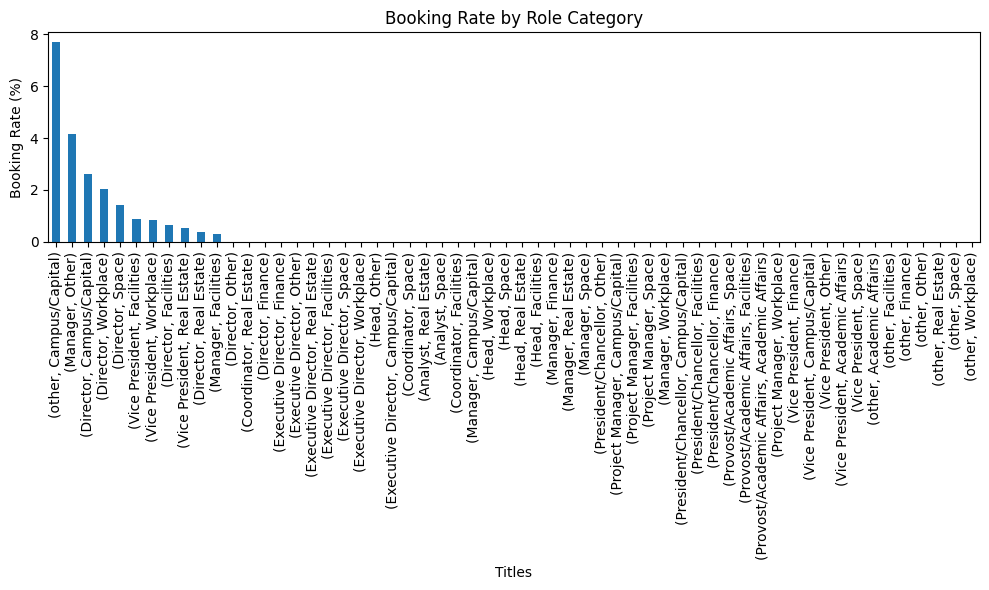

In [10]:
plot_booking_rate(summary)

In [11]:
sorted_summary["count"].sum()

np.int64(4543)

In [12]:
total_touches_analysis(df)
# activities
# print("Average Sequences enrolled for meetings booked:", activities[0])
# print("Average Touches received for meetings booked:", activities[1])

(3.0, 37.0)

In [26]:
yes_meeting = df[df["Meeting Booked"] != 0]
yes_meeting.head()

,Record ID,First,Last,Name,Currently In Sequence,Job Title,Company,State,Number of Sequences Enrolled,Number of Sales Activities,Create Date,Last Sequence Enrolled,Last Sequence Ended Date,Last Contacted,Last Engagement Date,Meeting Booked,role_category,func_group
0,2.816631e+10,Michael,Reese,Michael Reese,False,"Head Senior VP, Corporate Real Estate & Facili...",Customers Bank,Pennsylvania,3,37,6/7/2024 14:09,269668391,3/7/2025 14:23,4/2/2025 11:15,4/16/2025 16:35,1,Vice President,Facilities
1,4.373301e+06,Kris,Weir,Kris Weir,False,"Space Planning Director, Operations",Questrom School of Business,Massachusetts,8,37,3/7/2022 9:28,279559810,7/9/2025 12:33,10/20/2025 15:00,10/16/2025 12:57,1,Director,Space
2,3.323551e+06,Scott,Albert,Scott Albert,False,Vice President of Facilities,Slippery Rock University,Pennsylvania,14,67,10/18/2021 9:14,279109668,7/30/2025 14:25,10/15/2025 10:20,10/15/2025 12:04,1,Vice President,Facilities
3,1.446120e+11,Amy,Ciba,Amy Ciba,False,"Senior Director, Global Workplaces",Meltwater,Stockholms län,1,9,8/6/2025 15:11,269580465,8/6/2025 16:46,9/4/2025 12:54,8/17/2025 14:52,1,Director,Workplace
4,3.000951e+06,Jessica,Davenport,Jessica Davenport,False,Director Campus Planning & Design,Salt Lake Community College,Utah,8,74,7/19/2021 17:23,279559810,7/9/2025 10:06,9/17/2025 15:39,7/15/2025 10:35,1,Director,Campus/Capital


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record ID                     4543 non-null   float64
 1   First                         4543 non-null   object 
 2   Last                          4543 non-null   object 
 3   Name                          4543 non-null   object 
 4   Currently In Sequence         4543 non-null   bool   
 5   Job Title                     4542 non-null   object 
 6   Company                       4543 non-null   object 
 7   State                         3995 non-null   object 
 8   Number of Sequences Enrolled  4543 non-null   int64  
 9   Number of Sales Activities    4543 non-null   int64  
 10  Create Date                   4543 non-null   object 
 11  Last Sequence Enrolled        4543 non-null   int64  
 12  Last Sequence Ended Date      4036 non-null   object 
 13  Las

In [21]:
# prospects to enroll who have between 25-65 touches

three_months_ago = datetime.now() - timedelta(days=90)

sig_funcs = df[
    (df["Number of Sales Activities"].between(25,65)) & 
    (df["Meeting Booked"] == False) & 
    (df["role_category"] == "Director")
].copy()

sig_funcs["Last Contacted"] = pd.to_datetime(sig_funcs["Last Contacted"], errors="coerce")

prospects_to_enroll = sig_funcs[
    (sig_funcs["Last Contacted"].isna()) |
    (sig_funcs["Last Contacted"] < three_months_ago)
]

print(f"Found {len(prospects_to_enroll)} prospects to enroll.")
prospects_to_enroll[["Name", "Job Title", "Company", "Last Contacted", "Number of Sales Activities"]]

Found 215 prospects to enroll.


,Name,Job Title,Company,Last Contacted,Number of Sales Activities
55,Andre Aekins,"Sr. Director, Workplace Solutions",Capital One,2025-05-20 13:40:00,38
67,Heidi Albrecht,"Associate Director, Space Management",University Of Nevada-Las Vegas,2025-07-09 16:57:00,50
82,Debbie Allen,"Director, Real Estate & Facilities",MeridianLink,2025-07-25 10:20:00,27
90,Lawrence Altman,"Director, Facilities Operations",Coastal Carolina University,2025-07-09 09:37:00,43
99,Stephen Amoriello,"Director, Real Estate",Universal Health Services,2025-07-25 10:28:00,27
...,...,...,...,...,...
4294,Jason Wallace,"Director, Facilities Operations",Colgate University,2025-07-03 15:42:00,51
4385,Aaron Whitman,Director of Facilities Planning and Construction,CWI,2025-07-14 17:26:00,31
4386,Richard Whitney,"Director, Facilities Management",Grinnell College,2025-07-03 15:44:00,41
4481,Stan Yeakel,"Director, Facilities",Washington College,2025-07-18 14:18:00,57


In [19]:
# Folks who are in golden spot (between 25-65 touches and in workplace | campus/capital planning)

sig_funcs = df[
    (df["func_group"].isin(["Workplace", "Campus/Capital"])) &
    (df["Number of Sales Activities"].between(25,65)) & 
    (df["Meeting Booked"] == False) & 
    (df["role_category"] == "Director")
].copy()

sig_funcs["Last Contacted"] = pd.to_datetime(sig_funcs["Last Contacted"], errors="coerce")

prospects_to_enroll = sig_funcs[
    (sig_funcs["Last Contacted"].isna()) |
    (sig_funcs["Last Contacted"] < three_months_ago)
]

print(f"Found {len(prospects_to_enroll)} prospects to enroll.")
prospects_to_enroll[["Name", "Job Title", "Company", "Last Contacted", "Number of Sales Activities"]]

Found 35 prospects to enroll.


,Name,Job Title,Company,Last Contacted,Number of Sales Activities
55,Andre Aekins,"Sr. Director, Workplace Solutions",Capital One,2025-05-20 13:40:00,38
101,Mark Amott,"Workplace Services Director, Real Estate",Driscoll's,2025-07-25 10:29:00,29
401,Ross Bongiovi,Director of Facilities and Capital Planning - ...,Georgia Tech College of Sciences,2025-07-17 08:19:00,51
582,Paul Cable,"Director, Capital Planning",KSU,2025-07-09 10:01:00,29
663,Maritza Castro-Rendón,"Director, Real Estate & Workplace",Yext,2025-07-25 08:19:00,56
722,Dusty Christopher,Assistant Director of Capital Planning and Fac...,Jacksonville State,2025-07-08 13:17:00,28
759,Jim Cobb,"Director, Capital Projects and Planning",Tennessee Tech,2025-07-15 10:39:00,45
767,Jo Cohen,"Assistant Director, Campus Planning",UConn Health,2025-07-07 16:23:00,58
797,Tim Conlon,"Director, Real Estate and Workplace",Toyota,2025-07-25 09:27:00,57
852,Cindy Cox,Global Environmental Health Safety & Sustainab...,Marvell Technology,2025-07-10 09:00:00,26


In [22]:
# statistically significant sequence

df[df["Last Sequence Enrolled"] == 279559810]

,Record ID,First,Last,Name,Currently In Sequence,Job Title,Company,State,Number of Sequences Enrolled,Number of Sales Activities,Create Date,Last Sequence Enrolled,Last Sequence Ended Date,Last Contacted,Last Engagement Date,Meeting Booked,role_category,func_group
1,4.373301e+06,Kris,Weir,Kris Weir,False,"Space Planning Director, Operations",Questrom School of Business,Massachusetts,8,37,3/7/2022 9:28,279559810,7/9/2025 12:33,10/20/2025 15:00,10/16/2025 12:57,1,Director,Space
4,3.000951e+06,Jessica,Davenport,Jessica Davenport,False,Director Campus Planning & Design,Salt Lake Community College,Utah,8,74,7/19/2021 17:23,279559810,7/9/2025 10:06,9/17/2025 15:39,7/15/2025 10:35,1,Director,Campus/Capital
6,1.028880e+11,Jaime,English,Jaime English,False,Planning Manager (PDC),PCC,Oregon,2,17,2/28/2025 10:25,279559810,7/14/2025 17:39,9/4/2025 12:48,7/21/2025 14:03,1,Manager,Other
22,6.003901e+06,Sara,Smith,Sara Smith,False,Sr Campus Planner,Tufts University,MA,6,41,3/22/2023 17:11,279559810,9/16/2025 17:01,10/8/2025 8:00,9/16/2025 17:01,1,other,Campus/Capital
24,6.383601e+06,Brent,Stringfellow,Brent Stringfellow,False,"Director, Campus Planning & University Architect",UT Austin,Texas,3,40,7/21/2023 10:45,279559810,9/5/2025 9:20,10/23/2025 12:51,10/15/2025 11:37,1,Director,Campus/Capital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,1.028570e+11,Julie,Yeagerwalker,Julie Yeagerwalker,False,Project Manager,PCC,Oregon,2,14,2/28/2025 10:26,279559810,7/15/2025 10:57,7/11/2025 12:04,7/11/2025 17:54,0,Manager,Other
4490,5.044502e+06,Andrew,Young,Andrew Young,False,Architect/Director of Architectural Services a...,Vincennes University,Indiana,10,68,6/28/2022 13:08,279559810,9/17/2025 14:16,9/17/2025 14:16,9/17/2025 15:19,0,Director,Facilities
4496,6.474851e+06,Yancey,Young,Yancey Young,False,Lead Campus Planner,UT Austin,Texas,2,20,8/15/2023 12:53,279559810,9/17/2025 15:29,9/17/2025 15:29,10/1/2025 6:51,0,other,Campus/Capital
4511,3.208301e+06,Michael,Zanko,Michael Zanko,False,"Associate Vice President, Capital Planning and...",Montclair State University,New Jersey,8,56,9/13/2021 15:31,279559810,9/5/2025 8:18,9/5/2025 8:18,9/5/2025 8:21,0,Vice President,Campus/Capital


In [68]:
def by_title(title):
    title_df = sorted_summary.xs(title, level="func_group")
    length = title_df["count"].sum()
    total = title_df["sum"].sum() / title_df["count"].sum() * 100
    return total, length

def by_level(lev):
    level_df = sorted_summary.xs(lev, level="role_category")
    length = level_df["count"].sum()
    total = level_df["sum"].sum() / level_df["count"].sum() * 100
    return total, length

In [87]:
by_level("other")

(np.float64(0.2985074626865672), np.int64(335))